In [142]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.tools.monitor import job_monitor
import time

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

from IPython.display import Javascript
def window_open(url):
    display(Javascript('window.open("{url}");'.format(url=url)))

# creating a circuit with 2 Qubits and 2 classical bits
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# creating a superposition by applying a hadamrd gate to the qubits 
circuit.h(qr[0])
circuit.h(qr[1])
circuit.h(qr[2])

# measuring the qubits
circuit.measure(qr[0], cr[0]) 
circuit.measure(qr[1], cr[1])
circuit.measure(qr[2], cr[2])

ibmqfactory.load_account:WARNING:2021-02-28 19:15:19,288: Credentials are already in use. The existing account in the session will be replaced.


Schematic of Quantum Circuit


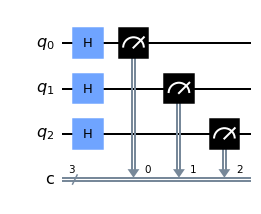

In [143]:
print('Schematic of Quantum Circuit') # visualisation of circuit using matplotlib
circuit.draw('mpl')

In [144]:
from qiskit.providers.ibmq import least_busy

# finding available providers and selecting the least busy quantum computers with the fewest jobs on queue
provider = IBMQ.get_provider(hub='ibm-q')
IBMQ.get_provider(project='main')

least_busy_device = provider.backends(filters=lambda x: x.configuration().n_qubits >= 5 and not x.configuration().simulator)
backend = least_busy(least_busy_device)

backend_name = backend.name() #calling the backend
backend_new_name = provider.get_backend(backend_name)           
job = execute(circuit, backend, shots=1) #executing the circuit
                               
print('Please wait while the Quantum Computer is rolling some quantum dice...')                 
job_monitor(job) # displays job status
count = job.result().get_counts()

# gets output from quantum computer and converts to decimal number
result = job.result() 
bits = result.get_counts(circuit)
bits = list(count.keys())[0]
dice_result = int(bits, 2)

import time

# dice reveal!
if dice_result == 0 or dice_result == 7:
    print('Oof, your luck broke the quantum computer. Let me roll you something better instead.')
    time.sleep(2)
    window_open("https://www.youtube.com/watch?v=oHg5SJYRHA0")
else:
    print('Dice shows:', dice_result, end='\n\n')
    print('Oh wait, got another roll for you...')
    time.sleep(2)
    window_open("https://www.youtube.com/watch?v=oHg5SJYRHA0")

Please wait while the Quantum Computer is rolling some quantum dice...
Job Status: job has successfully run
Dice shows: 2

Oh wait, got another roll for you...


<IPython.core.display.Javascript object>